# Linear Regression

## Introduction

Linear regression models the statistical relationship between two variables that may be related. The goal of linear regression is to estimate the impact of the variation in $X$ (independant/predictor/regressor variable) on central tendency of $Y$ (outcome/response/dependant variable) using a linear relationship. The linear regression can be represented as follow:
$$Y_{i} = \beta_{0} + \beta_{1}X_{i} + \epsilon_{i},$$ where $i$ index the observation, $\beta_{0}$ and $\beta_{1}$ are the parameters that govern the linear relationship, and finally $\epsilon_{i}$ is a stochastic error term. That is the dependant variable $Y$ is a function of a predictor variable $X.$ Once we obtain estimates for $\beta_{0}$ and $\beta_{1},$ we can use the following line to fit the data:
$$\hat{Y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i},$$ where $\hat{Y}_{i}$ is predicted $Y_{i},$ $\hat{\beta}_{0}$ is a estimate for $\beta_{0},$ and $\hat{\beta}_{1}$ is a estimate for $\beta_{1}.$ The estimates are choosen such that line best fits the data (details will be described below), where $\hat{\beta}_{0}$ is the intercept and $\hat{\beta}_{1}$ is the slope. 

The purpose of regression analysis is to model statistical relationships rather than just functional relationships as shown in the diagram below:

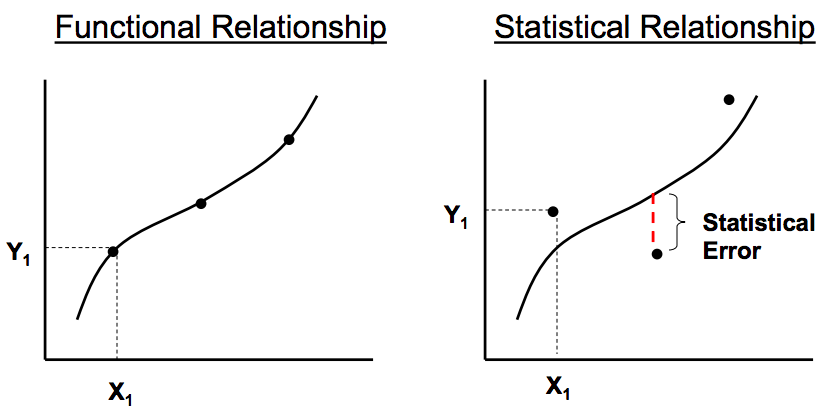

In [15]:
from IPython.display import Image, display
display(Image(filename='FunctionVsStat.png', embed=True))

This is why the true model (using $Y_{i}$ as outcome) contains $\epsilon_{i}$ component as the linear regression is usually not going to perfectly fit the data. 

## "Linear" in Linear Regression

Although so far we have considered linear regression to be a line of best fit: $$\hat{Y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i}.$$ However linear regression can actually model nonlinear relationships using polynomials: $$\hat{Y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i} + \hat{\beta}_{2}X_{i}^2 + \ldots + \hat{\beta}_{p}X_{i}^p.$$

This may be confusing as the name "Linear Regression" contains a "Linear" component. The linearity actually refers to the parameters (the $\beta$s) and not the regressors (the $X$s). That is linear regression can be nonlinear in variables, but it has to be linear in parameters. Here are some examples of "Nonlinear" Regression models: 
$$1) Y_{i} = \beta_{0}X_{i}^{\beta_{1}} + \epsilon_{i}, 2) Y_{i} = \beta_{0}exp({\beta_{1}X}) + \epsilon_{i}, 3) Y_{i} = sin(\beta_{1}X_{i} + \beta_{0}) + \epsilon_{i}.$$ All three models above are not linear in parameters as the parameters enter nonlinearly into the models. 

## Data Description

The dataset contains statistics of soccer (or football) matches from FIFA 2018. Although the data contains several team level statistics, we will be main ineterested in the numbers of goals scored and the number of attempted shots on net. 

In [2]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
from matplotlib.pyplot import *

In [3]:
# Load the Fifa data
fifa_data = pd.read_csv("FIFA2018Statistics.csv")

# Show structure of data set
fifa_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
# Keep variables of interest
fifa_data = fifa_data[['Goal Scored','On-Target']]

# Summary Statistics
fifa_data.describe()

,Goal Scored,On-Target
count,128.000000,128.000000
mean,1.320312,3.914062
std,1.156519,2.234403
min,0.000000,0.000000
25%,0.000000,2.000000
50%,1.000000,3.500000
75%,2.000000,5.000000
max,6.000000,12.000000


The above summary statistics table shows that average number of goals in a game about 1.5 goals and the mean shots on net is about 4 attempts. 

## Data Visualization

Let us start with exploring the scatter plot between the goals scored and number of shots on net. 

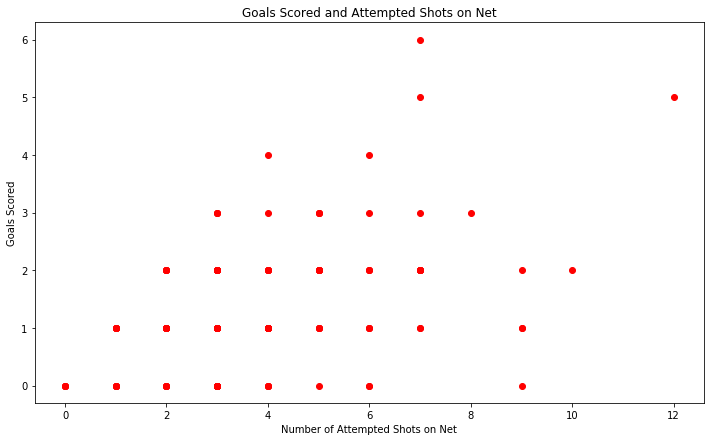

In [11]:
# Change size of figures
fig_size = [12,7]
rcParams["figure.figsize"] = fig_size

# Visualize data
plot(fifa_data['On-Target'], fifa_data['Goal Scored'], 'ro')

# Chart title
title('Goals Scored and Attempted Shots on Net')

# y-label
ylabel('Goals Scored')

# x-label
xlabel('Number of Attempted Shots on Net')

# Show scatter plot
show()

Not surprisingly, there seems to be a positive relationship between goals scored and number of shots on net. However it is difficult to observe the relationship from the above scatter plot. There is another function we can plot known as the Conditional Expectation Function (discussed below) which will make it easier to visualize the trend between goals scored and shots on net. 

## Mean and Conditional Mean

Given a random variable $X$ recall that the population mean is denoted by $\mu = E(X).$ The sample analog is given a data set $X_{1}, \ldots, X_{n}$ the sample mean is $\bar{X} = \frac{X_{1} + \ldots + X_{n}}{n}.$ An equivalent definition of the sample mean is $\hat{\mu}$ such that $$\min_{\hat{\mu}}\sum_{i=1}^{n}(X_{i} - \hat{\mu})^2 \implies 2\sum_{i=1}^{n}(X_{i} - \hat{\mu}) = 0 \implies n \hat{\mu} = \sum_{i=1}^{n}X_{i}  \implies \hat{\mu} = \bar{X}.$$

Given random variables $Y$ and $X$ the population conditional mean of $Y$ given $X$ is $E(Y|X).$ The sample analog is given a data $Y_{1}, \ldots, Y_{n}$ and value $X = x,$ then the sample conditional mean is $$(\overline{Y|X=x}) = \frac{1}{n_x}\sum_{i=1}^{n} I(X_{i} = x)Y_{i},$$ where $n_{x} =$ number of $Y$ values for $X = x$ and $I(X_{i} = x) = 1$ if $X_{i} = x$ and 0 otherwise. The conditional mean is essentially just the average all $Y$s when $X = x.$ Similar to the mean, an equivalent defition of the sample conditional mean is $$\min_{\hat{\mu}}\sum_{i=1}^{n_x}((Y_{i} - \hat{\mu}(x))^2|X_{i} = x) \implies \sum_{i=1}^{n_x}(Y_{i}|X_{i} = x) = n_x \mu(x) \implies \mu(x) = \frac{1}{n_x}\sum_{i=1}^{n} I(X_{i} = x)Y_{i}.$$

As we will see in the next section, the condition mean allows us to model a flexible relationship between $X$ and $Y$

## Conditional Expectation Function (CEF)

The Conditional Expectation Function (CEF) summarizes the relationship between $Y$ (outcome) and $X$ (regressor) in an intuitive and nonparametric (no $\beta$s needed) manner. The CEF is just the mean of $Y$ for each value of $X.$ Formally speaking, the population CEF is defined as $$g(x) = E(Y|X = x),$$ that is the CEF is a function of $X$ and is the expectation of $Y$ conditional on $X.$ We can estimate the CEF by using the sample analog: $$\hat{g}(x) = \sum_{i = 1}^{n} I(X_{i} = x)Y_{i},$$ where $I(.)$ is an indicator function and $I(X_{i} = x) = 1$ if $X_{i} = x$ and is 0 otherwise. Although the sample CEF is written a bit formally, $\hat{g(x)}$ is just the sample average of all $Y$s when $X = x.$ Let us illustrate the CEF in our FIFA data where $Y = $ goals and $X = $ shot attempts on net. 

In [12]:
# Conditional Expectation Function (CEF)
# Code below estimate E(Y|X = x) for each x

# Unique X values
xval = list(set(attempts))

# Average outcome for each X = x
ymean_x = [np.mean(goals[attempts == i]) for i in xval]

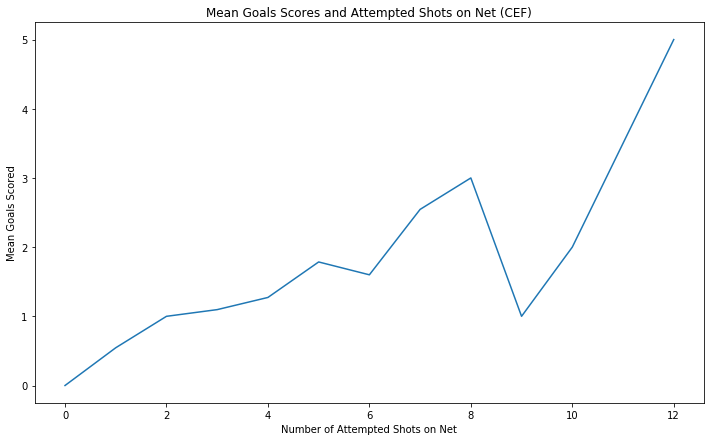

In [13]:
# Plot sample CEF
plot(xval, ymean_x)

# Chart title
title('Mean Goals Scores and Attempted Shots on Net (CEF)')

# y-label
ylabel('Mean Goals Scored')

# x-label
xlabel('Number of Attempted Shots on Net')

# Show scatter plot
show()

The above plot is the estimated CEF for our FIFA application. The positive relationship between goals scored and shots on net is made much more clear in the above CEF. 

For each attempted shot on net $\{0, 1, \ldots, 12\}$ we are averaging the goals scored. This should become more clear by reffering back to our initial scatter plot of the data above. For example notice that for $X = 12$ there is only one corresponding $Y = 5$ which matches with the CEF that $g(12) = 5.$ Another example is for $X = 9$ there are multiple corresponding $Y \in \{0,2,1,1\}$ which implies $g(9) = \frac{0+2+1+1}{4} = 1.$

## Linear Regression and The CEF

The CEF $E(Y|X)$ represents the relationship between $X$ and $Y$ by taking the mean of the conditional probability distribution $Y|X=x$ for all $x.$ This idea is illustrated in the figure below:

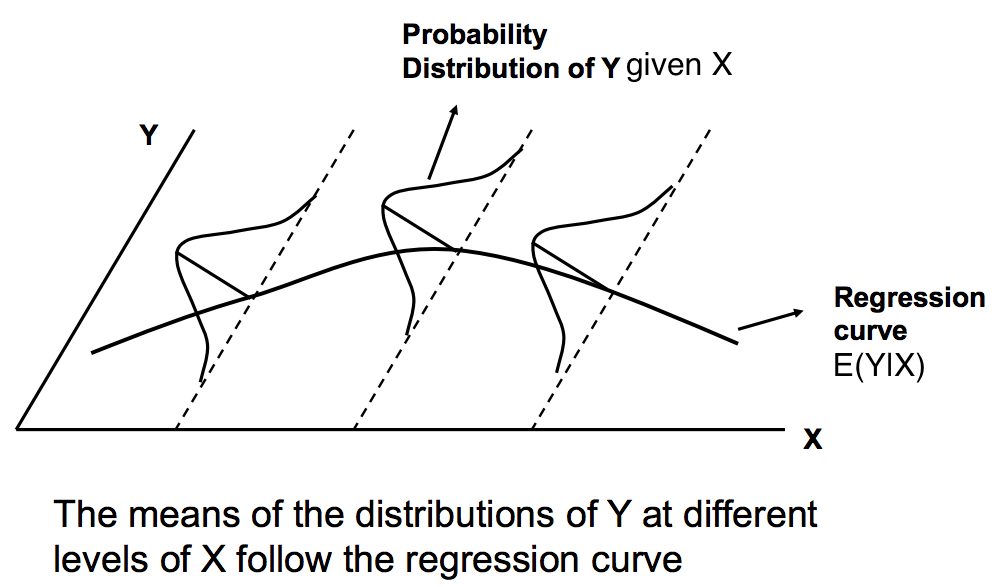

In [16]:
display(Image(filename='RegressionCEF.png', embed=True))

The outcome variable $Y$ can be decomposed as follows: $$Y = E(Y|X) + \epsilon,$$ where $\epsilon$ is a stochastic error term. 

The linear regression is essentially a parametrization of the CEF. That is we assume for example $E(Y|X) = \beta_{0} + \beta_{1}X,$ plugging this into the above decomposition results in the standard linear regression $Y = \beta_{0} + \beta_{1}X + \epsilon.$ In otherwords we can think about the linear regression as an approximation to the CEF.

## Estimating Linear Regression Parameters

The parameters in the linear regression can be estimated by minimizing the following objective function: $$\min_{\beta_{0}, \beta_{1}}\sum_{i=1}^{n}(Y_{i} - \beta_{0} - \beta_{1}X_{i})^2 \implies \hat{\beta_{1}} = \frac{s_{xy}}{s_{x}s_{y}}, \hat{\beta_{0}} = \bar{Y} - \hat{\beta_{1}}\bar{X}.$$
This is know as square loss (or L2 loss) function and is motivated by the definition of the conditional mean as discussed above. 


Suppose we have multiple regressors $x_{1}, \ldots, x_{k}$ then using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{k1}\\
    \vdots & \vdots & \ldots & \vdots \\
    1 & x_{12} & \ldots & x_{k2}\\
    1 & x_{1n} & \ldots & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$

In [7]:
# Code below estimate beta using inv(X'X)X'y
# Implement closed form solutions for linear regression
def estimate_model(y,X):
    
    # X transpose
    Xtranspose = np.matrix.transpose(X)
    
    # Closed form solution is BetaHat = inv(X'X)*X'y
    BetaHat = np.dot(np.linalg.inv(np.dot(Xtranspose,X)),np.dot(Xtranspose,y))
    
    return BetaHat

For the FIFA application we are interested in the estimating the following model: $$GoalsScored_{i} = \beta_{0} + \beta_{1}ShotsOnTarget_{i} + \epsilon.$$

In [8]:
# Estimate a one degree linear regression model (using standard square loss function)
# Simple linear regression is y = B0 + B1*x

# Define outcome vector (gross movie sales revenue)
attempts = np.array(fifa_data['On-Target'])

# Define covariate (IMDB movie rating)
goals = np.array(fifa_data['Goal Scored'])

# Vector of ones (for B0)
ones = np.ones(len(goals))

# Define design matrix
design_simple = np.column_stack((ones,attempts))

# Estimate (Beta0, Beta1) for simple linear regression model
betahat_simple = estimate_model(goals,design_simple)
print('Regression parameter estimates [intercept, slope] = %s' % betahat_simple)

Regression parameter estimates [intercept, slope] = [ 0.38494806  0.23897534]


The slope estimate of $0.25$ says that on average it takes 4 on target shot attempts to score a goal in a FIFA match. 

## Comparing Estimated CEF and Linear Regression

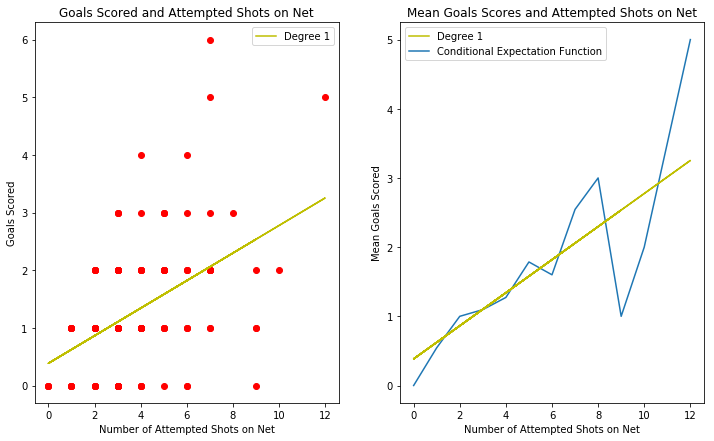

In [17]:
# Setup 1x2 plot (left plot)
subplot(1, 2, 1)

# Scatter plot of data
plot(fifa_data['On-Target'], fifa_data['Goal Scored'], 'ro')

# Chart title
title('Goals Scored and Attempted Shots on Net')

# y-label
ylabel('Goals Scored')

# x-label
xlabel('Number of Attempted Shots on Net')

# Plot simple linear regression (degree 1)
simple, = plot(attempts, betahat_simple[0] + attempts*betahat_simple[1], 'y')

# Legend for simple linear regression scatter plot, plot on left
legend([simple], ['Degree 1'])

# Setup 1x2 plot (right plot)
subplot(1, 2, 2)

# Plot sample CEF
CEF, = plot(xval, ymean_x)

# Chart title
title('Mean Goals Scores and Attempted Shots on Net')

# y-label
ylabel('Mean Goals Scored')

# x-label
xlabel('Number of Attempted Shots on Net')

# Plot simple linear regression (degree 1)
simple_cef, = plot(attempts, betahat_simple[0] + attempts*betahat_simple[1], 'y')

# Legend for simple linear regression scatter plot, plot on left
legend([simple_cef, CEF], ['Degree 1', 'Conditional Expectation Function'])

# Show scatter plots
show()

The left plot shows the line of best fit on the scatter plot of goals scored and the number of attempted shots on net. Whereas the right plot illustrates how the linear regression approximates the CEF. On average the line of best fit is a decent approximation to the CEF. We could pottentially improve the approximation and capture the nonlinearities in the CEF by adding higher degree polynomial terms in the regression. 

## Conclusion

In this notebook we discuss linear regression as a method of modeling the statistical relationship between an outcome $Y$ and explanatory variables $X_{1}, \ldots, X_{k}.$ We can think about the linear regression as an approximation to the Conditional Expectation Function (CEF) which nonparametrically models the relationship between $Y$ and $X$s. Linear regression parameters are found the minimizing the L2 loss function which is motivated from the definition of conditional mean. We find that there is a significant positive relationship in the number of goals scored and the shots on net for FIFA 2018. In particular, 4 shot attempts on net on average will be associated with a goal in FIFA. 